Antes de comenzar, realizaremos los pasos correspondientes para montar nuestro sistema en drive:
*   Importaremos Drive a google colab y montaremos nuestro sistema nos pedira ir a una url y copiar el codigo dado.
*   Crearemos la variable ruta



In [ ]:
from google.colab import drive
drive.mount ('/content/solar')

Drive already mounted at /content/solar; to attempt to forcibly remount, call drive.mount("/content/solar", force_remount=True).


In [ ]:
ruta= '/content/solar/MyDrive/Colab Notebooks/solar'

Importaremos las librerias principales





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Importaremos el archivo csv y mostraremos su info para comprobar que se lean los datos

In [ ]:
dataset = pd.read_excel(ruta + '/SolarPrediction.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


Visualización de funciones 

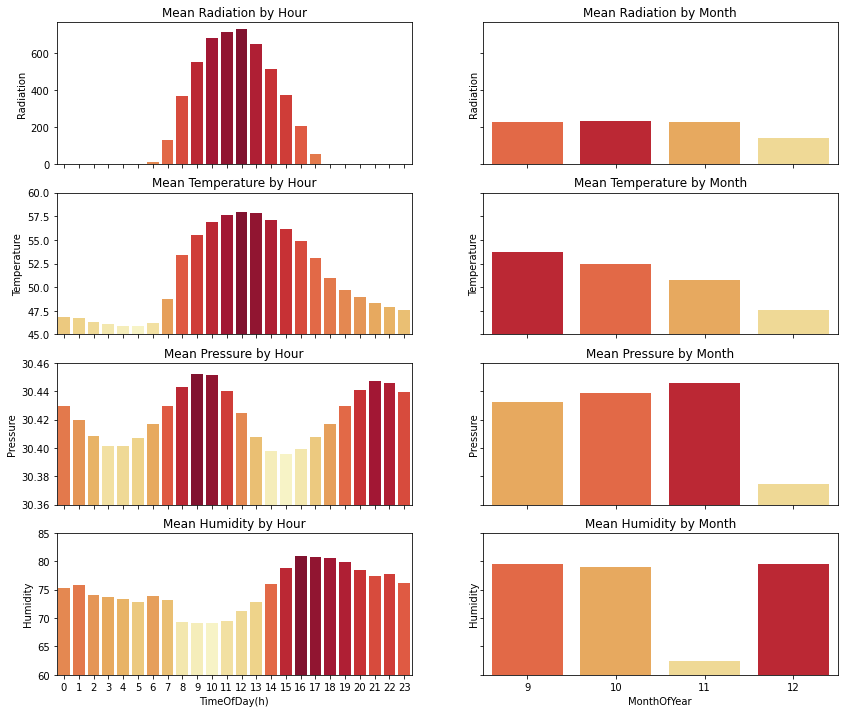

In [ ]:
grouped_m=dataset.groupby('MonthOfYear').mean().reset_index()
grouped_w=dataset.groupby('WeekOfYear').mean().reset_index()
grouped_d=dataset.groupby('DayOfYear').mean().reset_index()
grouped_h=dataset.groupby('TimeOfDay(h)').mean().reset_index()

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))
ax3.set_ylim(45,60)
ax5.set_ylim(30.36,30.46)
ax7.set_ylim(60,85)

ax1.set_title('Mean Radiation by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Radiation'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Radiation', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Mean Radiation by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Radiation'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Radiation', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')

ax3.set_title('Mean Temperature by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Temperature'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Temperature', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Mean Temperature by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Temperature'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Temperature', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Mean Pressure by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Pressure'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Pressure', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Mean Pressure by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Pressure'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Pressure', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Mean Humidity by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Humidity'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Humidity', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax7)

ax8.set_title('Mean Humidity by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Humidity'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Humidity', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax8)

plt.show()

Correlación de Pearson 

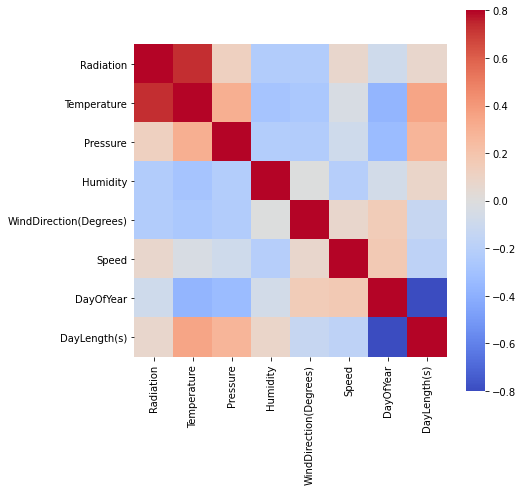

In [ ]:
corrmat = dataset.drop(['TimeOfDay(h)', 'TimeOfDay(m)', 'TimeOfDay(s)', 'UNIXTime', 'MonthOfYear', 'WeekOfYear'], inplace=False, axis=1)
corrmat = corrmat.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmin=-.8, vmax=.8, square=True, cmap = 'coolwarm')
plt.show()

Separar las variables independientes y dependientes 

In [ ]:
X = dataset[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'DayOfYear', 'TimeOfDay(s)']]
y = dataset['Radiation']

División del conjunto de datos 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Selección de características 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)
feature_importances = regressor.feature_importances_

X_train_opt = X_train.copy()
removed_columns = pd.DataFrame()
models = []
r2s_opt = []

for i in range(0,5):
    least_important = np.argmin(feature_importances)
    removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
    regressor.fit(X_train_opt, y_train)
    feature_importances = regressor.feature_importances_
    accuracies = cross_val_score(estimator = regressor,
                                 X = X_train_opt,
                                 y = y_train, cv = 5,
                                 scoring = 'r2')
    r2s_opt = np.append(r2s_opt, accuracies.mean())
    models = np.append(models, ", ".join(list(X_train_opt)))
    
feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})
feature_selection.head()

,Features,r2 Score
0,"Temperature, Pressure, Humidity, WindDirection...",0.932420
1,"Temperature, Humidity, WindDirection(Degrees),...",0.930824
2,"Temperature, Humidity, DayOfYear, TimeOfDay(s)",0.933475
3,"Temperature, DayOfYear, TimeOfDay(s)",0.930819
4,"Temperature, TimeOfDay(s)",0.804013


Ajuste de la regresión a las características clave

In [ ]:
X_train_best = X_train[['Temperature', 'DayOfYear', 'TimeOfDay(s)']]
X_test_best = X_test[['Temperature', 'DayOfYear', 'TimeOfDay(s)']]
regressor.fit(X_train_best, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Validación cruzada 

In [ ]:
accuracies = cross_val_score(estimator = regressor, X = X_train_best,y = y_train, cv = 10, scoring = 'r2')
accuracy = accuracies.mean()
print('r2 = {}'.format(accuracy))

r2 = 0.9342618513669108


Predicción del conjunto de prueba 

In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
y_pred = regressor.predict(X_test_best)
explained_variance_score = explained_variance_score(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.9366217728660821
mse = 6417.253015824006
r2 = 0.936620552395834


Visualizando el modelo 

In [ ]:
# Predicting for whole dataset
dataset['y_pred'] = regressor.predict(dataset[['Temperature', 'DayOfYear', 'TimeOfDay(s)']])

# Create Interactive Plot Using Bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d
output_notebook() 

p = figure(plot_width=800, 
           plot_height=400,
           title="Solar Irradiance Predictions",
           x_axis_label='Date and Time',
           y_axis_label='Solar Irradiance',
           x_axis_type="datetime")
p.x_range = Range1d(dataset.index[0], dataset.index[600])
p.y_range = Range1d(-100, 1800, bounds=(-100, 1800))
p.line(dataset.index, dataset['Radiation'], legend='Observed Solar Irradiance', line_width=1)
p.line(dataset.index, dataset['y_pred'], legend='Predicted Solar Irradiance', line_width=1, line_color="red")

show(p, notebook_handle = True)
